# **Uploading CSV**

In [0]:
#from google.colab import files
#uploaded=files.upload()

# **Exploratory Data Analysis**

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df=pd.read_csv("bhp.csv")
df.head(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [0]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [0]:
#1) different types of areas in bangalore and we can see there are more super built up areas
df['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

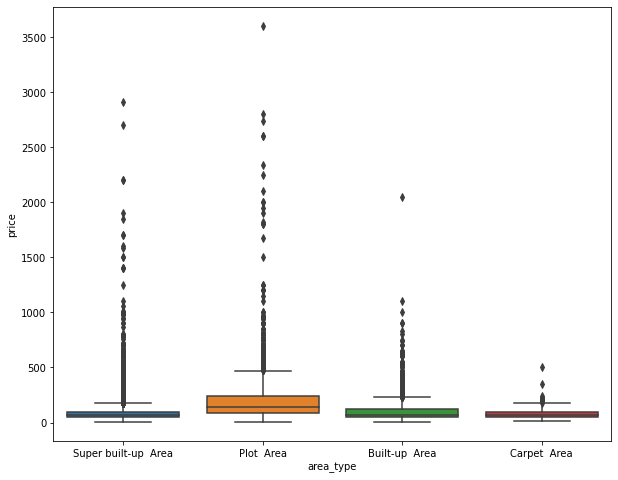

In [0]:
#2) area and price
plt.figure(figsize=(10,8))
sns.boxplot(x='area_type',y='price',data=df)

In [0]:
df.groupby('area_type')['price'].agg('mean')
#we can see that average price of plot area is greater and carpet area is less which really makes sense

area_type
Built-up  Area          104.285498
Carpet  Area             89.502356
Plot  Area              208.495486
Super built-up  Area     92.971757
Name: price, dtype: float64

In [0]:
df['location'].value_counts()
#sns.countplot('location',data=df)
# more houses are available in whitefield,sarjapur,electronic city areas because of large IT crowd which is also believable

Whitefield               540
Sarjapur  Road           399
Electronic City          302
Kanakpura Road           273
Thanisandra              234
                        ... 
Williams Town              1
EPIP AREA, WHITEFIELD      1
Kathriguppe IV Phase       1
S R Layout                 1
MRCR Layout                1
Name: location, Length: 1305, dtype: int64

In [0]:
# location and area-types i.e location name where each area_type is largely available
g=df.groupby(['area_type','location'])  #since price will be there for every row..i counted no of price rows
pa,ca,ba,sba=[],[],[],[]
area_loc,sorted_area_loc={},{}
for i,gdf in g:
  area_loc[i]=len(gdf)
import operator
sorted_area_loc=dict(sorted(area_loc.items(), key=operator.itemgetter(1),reverse=True))
sorted_area_loc
#we can see that Super built areas are mostly located in whitefield,sarjapur road,kanakpur road,elec city etc..
#                Built up areas are mostly located in Electronic city,white field, etc..
#                plot areas which are costly are mostly located in whitefield,TC palaya..etc
#                carpet areas are not available much and they are rarely available across different locations

{('Super built-up  Area', 'Whitefield'): 374,
 ('Super built-up  Area', 'Sarjapur  Road'): 314,
 ('Super built-up  Area', 'Kanakpura Road'): 234,
 ('Super built-up  Area', 'Electronic City'): 211,
 ('Super built-up  Area', 'Thanisandra'): 203,
 ('Super built-up  Area', 'Yelahanka'): 159,
 ('Super built-up  Area', 'Hebbal'): 146,
 ('Super built-up  Area', 'Uttarahalli'): 146,
 ('Super built-up  Area', 'Raja Rajeshwari Nagar'): 143,
 ('Super built-up  Area', 'Marathahalli'): 141,
 ('Super built-up  Area', 'Haralur Road'): 127,
 ('Super built-up  Area', 'Hennur Road'): 125,
 ('Super built-up  Area', 'Bannerghatta Road'): 112,
 ('Super built-up  Area', '7th Phase JP Nagar'): 111,
 ('Plot  Area', 'Whitefield'): 85,
 ('Built-up  Area', 'Electronic City'): 81,
 ('Built-up  Area', 'Whitefield'): 81,
 ('Super built-up  Area', 'Bellandur'): 80,
 ('Super built-up  Area', 'Electronic City Phase II'): 79,
 ('Super built-up  Area', 'Rajaji Nagar'): 79,
 ('Super built-up  Area', 'Begur Road'): 76,
 (

In [0]:
df.groupby('location')['price'].agg('mean').sort_values(ascending=False).head(20)
#we can see that the average price of house is highly expensive in cubbon road
#here there are more suspicious data which might be affecting  our analysis like single house in an area etc(cubbon road)..we will eliminate all those outliers in feature engineering

location
Cubbon Road              1900.000000
Ashok Nagar              1486.000000
Defence Colony           1167.714286
Yemlur                   1093.388889
Church Street            1068.000000
D Souza Layout           1015.000000
Sadashiva Nagar          1011.100000
Sindhi Colony             988.000000
Srinivas Colony           922.000000
5th Block Jayanagar       905.000000
Binnamangala              900.000000
Cunningham Road           824.384615
Hunasamaranahalli         787.500000
2nd Block Koramangala     761.000000
Shanthala Nagar           754.000000
Dollars Colony            744.375000
Kathreguppe               725.000000
Sector 4 HSR Layout       700.000000
Rest House Road           690.000000
Ramakrishnappa Layout     662.857143
Name: price, dtype: float64

In [0]:
df.groupby('size')['price'].agg('mean').sort_values(ascending=False)

size
43 Bedroom    660.000000
10 Bedroom    561.250000
16 BHK        550.000000
19 BHK        490.000000
5 BHK         425.618644
7 BHK         389.294118
10 BHK        342.500000
12 Bedroom    300.000000
4 BHK         278.415220
13 BHK        275.000000
4 Bedroom     265.067379
11 BHK        255.000000
5 Bedroom     252.929293
9 BHK         248.250000
9 Bedroom     240.847826
27 BHK        230.000000
6 Bedroom     226.455497
7 Bedroom     214.686747
8 Bedroom     209.666667
6 BHK         207.833333
18 Bedroom    200.000000
8 BHK         172.000000
11 Bedroom    160.000000
3 Bedroom     158.218976
14 BHK        125.000000
3 BHK         104.953519
2 Bedroom      93.563465
1 Bedroom      72.851143
2 BHK          57.428640
1 BHK          39.525204
1 RK           28.122308
Name: price, dtype: float64

In [0]:
df['bath'].value_counts()
#There are more number of houses with 2 bathrooms in bengaluru

2.0     6908
3.0     3286
4.0     1226
1.0      788
5.0      524
6.0      273
7.0      102
8.0       64
9.0       43
10.0      13
12.0       7
13.0       3
11.0       3
16.0       2
27.0       1
18.0       1
40.0       1
15.0       1
14.0       1
Name: bath, dtype: int64

In [0]:
df['balcony'].value_counts()
#There are more number of 2 balcony houses in bangalore

2.0    5113
1.0    4897
3.0    1672
0.0    1029
Name: balcony, dtype: int64

# **Feature Engineering**

In [0]:
#finding the suitable dataframe
dff=df.drop(columns=['availability','society'])
dff.head(5)

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00


**Removing NULL Values**

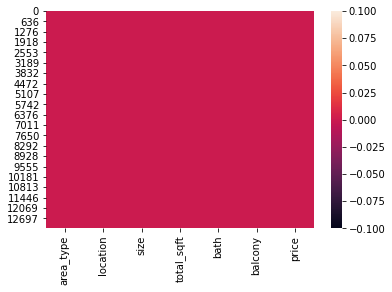

In [0]:
dff.isnull().sum()
#removing all null valued rows
dff.dropna(inplace=True)
sns.heatmap(dff.isnull())

**Correcting the size column**

In [0]:
dff['size'].unique()
dff['size']=dff['size'].apply(lambda size: int(size.split(' ')[0]))
dff.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2,1200,2.0,1.0,51.00


**Correcting the total_sqft feature as it contains range**

In [0]:
def convert(val):
  ranges=val.split('-')
  if(len(ranges)==2):
    return (float(ranges[0])+float(ranges[1]))/2
  else:
    try:
      return float(val)
    except:
      return None

In [0]:
dff['total_sqft'].unique()
dff['total_sqft']=dff['total_sqft'].apply(convert) #on doing this some cells may replace with None i.e null so dlt them

In [0]:
dff.isnull().sum()
dff=dff.dropna()

**Dimensionality Reduction**

In [0]:
dff['location']=dff['location'].apply(lambda x: x.strip())
df2=dff['location'].value_counts()
locs_less_than_10=df2[df2<=10]  #renaming all the features(locations) having less than 10 houses as others
len(df2)-len(locs_less_than_10)
locs_less_than_10

1st Block Koramangala    10
Doddaballapur            10
Dairy Circle             10
Kodigehalli              10
HAL 2nd Stage            10
                         ..
Abshot Layout             1
Richmond Road             1
6th Block Jayanagar       1
Neelasandra               1
MRCR Layout               1
Name: location, Length: 1013, dtype: int64

In [0]:
dff['location']=dff['location'].apply(lambda x: 'other' if x in locs_less_than_10 else x)
dff['location'].value_counts()

other                        2741
Whitefield                    514
Sarjapur  Road                372
Electronic City               302
Kanakpura Road                259
                             ... 
Karuna Nagar                   11
Tindlu                         11
Marsur                         11
2nd Phase Judicial Layout      11
Prithvi Layout                 11
Name: location, Length: 236, dtype: int64

**Adding a new column pricepersqft to eliminate further more outliers**

In [0]:
dff['pricepersqft']=(dff['price']*100000)/dff['total_sqft']
dff.head(5)

,area_type,location,size,total_sqft,bath,balcony,price,pricepersqft
0,Super built-up Area,Electronic City Phase II,2,1056.0,2.0,1.0,39.07,3699.810606
1,Plot Area,Chikka Tirupathi,4,2600.0,5.0,3.0,120.00,4615.384615
2,Built-up Area,Uttarahalli,3,1440.0,2.0,3.0,62.00,4305.555556
3,Super built-up Area,Lingadheeranahalli,3,1521.0,3.0,1.0,95.00,6245.890861
4,Super built-up Area,Kothanur,2,1200.0,2.0,1.0,51.00,4250.000000


**Outlier Removal**

**Normally square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft. If you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier. We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft**

In [0]:
dff[dff['total_sqft']/dff['size']<300]
df3=dff[~(dff['total_sqft']/dff['size']<300)]
df3.head(5)

,area_type,location,size,total_sqft,bath,balcony,price,pricepersqft
0,Super built-up Area,Electronic City Phase II,2,1056.0,2.0,1.0,39.07,3699.810606
1,Plot Area,Chikka Tirupathi,4,2600.0,5.0,3.0,120.00,4615.384615
2,Built-up Area,Uttarahalli,3,1440.0,2.0,3.0,62.00,4305.555556
3,Super built-up Area,Lingadheeranahalli,3,1521.0,3.0,1.0,95.00,6245.890861
4,Super built-up Area,Kothanur,2,1200.0,2.0,1.0,51.00,4250.000000


**Keeping only the data values between the mean and 1st standard deviation(67% approx)..This eliminates most of the outliers**

In [0]:
df3['pricepersqft'].describe()

count     12013.000000
mean       6206.082347
std        3985.518807
min         267.829813
25%        4199.363057
50%        5252.525253
75%        6823.529412
max      176470.588235
Name: pricepersqft, dtype: float64

Here we find that min price per sqft is 267 rs/sqft whereas max is 12000000, this shows a wide variation in property prices. We should remove outliers per location using mean and one standard deviation

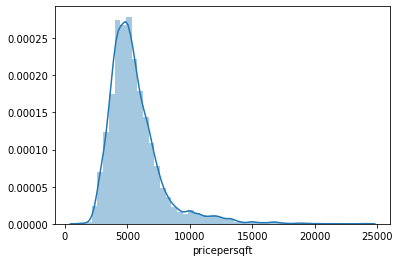

In [0]:
def eliminate_tails(df):
    temp = pd.DataFrame()
    for gid, gdf in df.groupby('location'):
        mean = np.mean(gdf['pricepersqft'])
        stdev = np.std(gdf['pricepersqft'])
        reduced_df = gdf[(gdf['pricepersqft']>(mean-stdev)) & (gdf['pricepersqft']<=(mean+stdev))]
        temp = pd.concat([temp,reduced_df],ignore_index=True)
    return temp
df4 = eliminate_tails(df3)
sns.distplot(df4['pricepersqft'])

**Removing the 3bhk houses which are less than avg of 2bhk houses in same location at same sqft..which are like outliers**

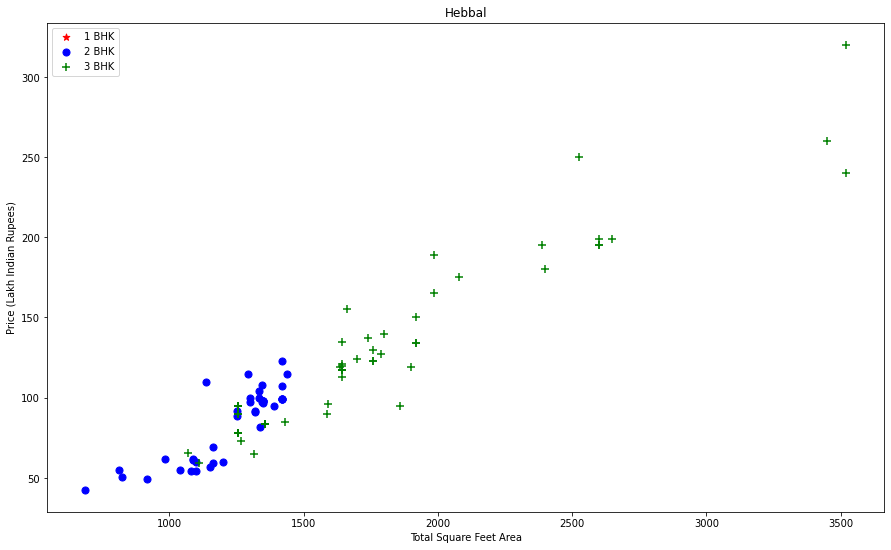

In [0]:
#visualization code for price vs sqft for each kind of house
def plot_scatter_chart(df,location):
    bhk1 = df[(df.location==location) & (df['size']==1)]
    bhk2 = df[(df.location==location) & (df['size']==2)]
    bhk3 = df[(df.location==location) & (df['size']==3)]
    plt.figure(figsize=(15,9))
    plt.scatter(bhk1.total_sqft,bhk1.price,color='red',marker='*',label='1 BHK', s=50)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
plot_scatter_chart(df4,'Hebbal')   #before removal

In [0]:
df5=df4.copy()
g=df5.groupby('location')
for grid,grdf in g:
  location_price_2bhk=np.mean(grdf[grdf['size']==2]['price'])
  removed_df=grdf[(grdf['size']==3)&(grdf['price']<location_price_2bhk)]
  df5=pd.concat([df5,removed_df,removed_df]).drop_duplicates(keep=False)

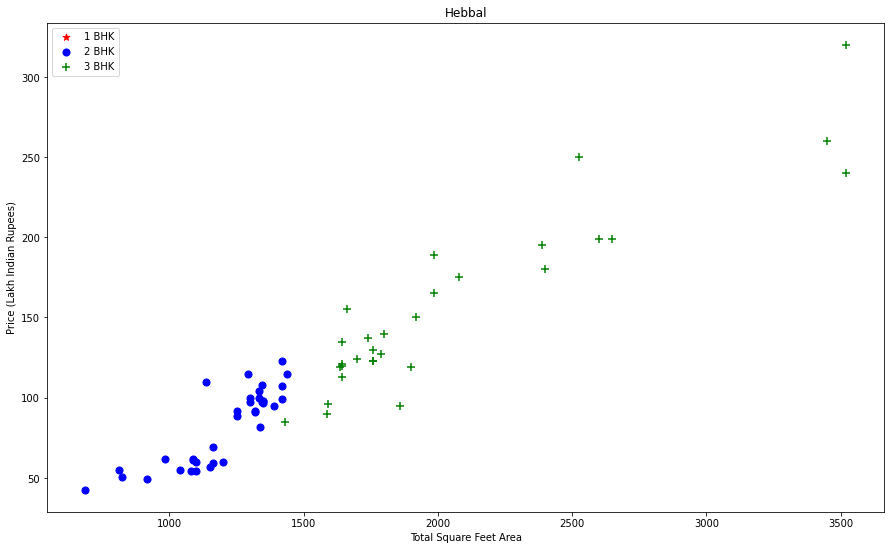

In [0]:
plot_scatter_chart(df5,'Hebbal')  #after removal of such houses

**Removing outliers in Bathroom and Balcony features**

In [0]:
df5['bath'].unique() #Even there are 13 bath roomed houses in bglr

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 13.])

Removing the houses where number of bathrooms are greater than no of bedrooms hall and kitchen

In [0]:
temp1=df5[df5['bath']>=df5['size']+2]
print(len(df5))
df5=pd.concat([df5,temp1,temp1]).drop_duplicates(keep=False)
print(len(df5))

8343
8266


Removing houses where there are more balconies than number of bedrooms hall and kitchen

In [0]:
temp2=df5[(df5['size']==1)&(df5['balcony']>=2)]
df5=pd.concat([df5,temp2,temp2]).drop_duplicates(keep=False)
df5.head(3) #removed all such houses

,area_type,location,size,total_sqft,bath,balcony,price,pricepersqft
0,Super built-up Area,1st Block Jayanagar,4,2850.0,4.0,1.0,428.0,15017.543860
1,Super built-up Area,1st Block Jayanagar,3,1630.0,3.0,2.0,194.0,11901.840491
2,Super built-up Area,1st Block Jayanagar,3,1875.0,2.0,3.0,235.0,12533.333333


**Encoding Categorical Variables (ONE HOT ENCODING) **

In [0]:
df6=df5.copy()
dummies1=pd.get_dummies(df5['area_type'],drop_first=True)
dummies1
dummies2=pd.get_dummies(df5['location'],drop_first=True)
dummies2
#concatenate new and remove old

,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,Amruthahalli,Anandapura,Ananth Nagar,Anekal,Anjanapura,Ardendale,Arekere,Attibele,BEML Layout,BTM 2nd Stage,BTM Layout,Babusapalaya,Balagere,Banashankari,Banashankari Stage II,Banashankari Stage III,Banashankari Stage V,Banashankari Stage VI,Banaswadi,Banjara Layout,Bannerghatta,Bannerghatta Road,Basavangudi,Basaveshwara Nagar,Battarahalli,Begur,Begur Road,...,Sanjay nagar,Sarakki Nagar,Sarjapur,Sarjapur Road,Sarjapura - Attibele Road,Sector 2 HSR Layout,Sector 7 HSR Layout,Seegehalli,Shampura,Shivaji Nagar,Singasandra,Somasundara Palya,Sompura,Sonnenahalli,Subramanyapura,Sultan Palaya,TC Palaya,Talaghattapura,Thanisandra,Thigalarapalya,Thubarahalli,Tindlu,Tumkur Road,Ulsoor,Uttarahalli,Varthur,Varthur Road,Vasanthapura,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9846,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
9847,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
9849,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
9850,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [0]:
df6=pd.concat([df6,dummies1,dummies2],axis='columns')
df6=df6.drop(columns=['location','area_type'],axis='columns')
df6.head(5)

,size,total_sqft,bath,balcony,price,pricepersqft,Carpet Area,Plot Area,Super built-up Area,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,Amruthahalli,Anandapura,Ananth Nagar,Anekal,Anjanapura,Ardendale,Arekere,Attibele,BEML Layout,BTM 2nd Stage,BTM Layout,Babusapalaya,Balagere,Banashankari,Banashankari Stage II,Banashankari Stage III,Banashankari Stage V,Banashankari Stage VI,...,Sanjay nagar,Sarakki Nagar,Sarjapur,Sarjapur Road,Sarjapura - Attibele Road,Sector 2 HSR Layout,Sector 7 HSR Layout,Seegehalli,Shampura,Shivaji Nagar,Singasandra,Somasundara Palya,Sompura,Sonnenahalli,Subramanyapura,Sultan Palaya,TC Palaya,Talaghattapura,Thanisandra,Thigalarapalya,Thubarahalli,Tindlu,Tumkur Road,Ulsoor,Uttarahalli,Varthur,Varthur Road,Vasanthapura,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,4,2850.0,4.0,1.0,428.0,15017.543860,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,1630.0,3.0,2.0,194.0,11901.840491,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,1875.0,2.0,3.0,235.0,12533.333333,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,1235.0,2.0,2.0,148.0,11983.805668,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,4,2750.0,4.0,0.0,413.0,15018.181818,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# **Feature Selection**

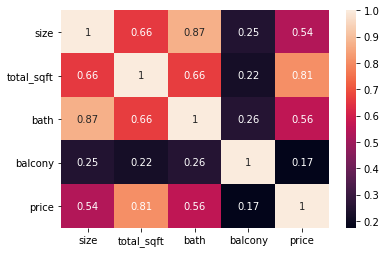

In [0]:
df7=df6.copy()
sns.heatmap(df7.iloc[:,:5].corr(),annot=True)

We can see total_sqft has high correlation with price

We can see bathrooms and size are also having high correlation..so we can drop any one,we will drop bathroom

We can see balcony has less correlation with price..so drop balcony

In [0]:
df7=df7.drop(columns=['bath','balcony'])
#we can also drop pricepersqft which is of no use here
df7=df7.drop(columns=['pricepersqft'])
df7.head(3)

,size,total_sqft,price,Carpet Area,Plot Area,Super built-up Area,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,Amruthahalli,Anandapura,Ananth Nagar,Anekal,Anjanapura,Ardendale,Arekere,Attibele,BEML Layout,BTM 2nd Stage,BTM Layout,Babusapalaya,Balagere,Banashankari,Banashankari Stage II,Banashankari Stage III,Banashankari Stage V,Banashankari Stage VI,Banaswadi,Banjara Layout,Bannerghatta,...,Sanjay nagar,Sarakki Nagar,Sarjapur,Sarjapur Road,Sarjapura - Attibele Road,Sector 2 HSR Layout,Sector 7 HSR Layout,Seegehalli,Shampura,Shivaji Nagar,Singasandra,Somasundara Palya,Sompura,Sonnenahalli,Subramanyapura,Sultan Palaya,TC Palaya,Talaghattapura,Thanisandra,Thigalarapalya,Thubarahalli,Tindlu,Tumkur Road,Ulsoor,Uttarahalli,Varthur,Varthur Road,Vasanthapura,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,4,2850.0,428.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,1630.0,194.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,1875.0,235.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# **Feature Scaling and TrainTestSplit**

We can see the range of values are not same as sqft is in 1000's and size is in single digits etc..we need to do standard normalization

In [0]:
df8=df7.copy()
df8.iloc[:,:2]
x=df8.drop(columns=['price'])
x.head(5)
y=df8['price']
x.head(5)

,size,total_sqft,Carpet Area,Plot Area,Super built-up Area,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,Amruthahalli,Anandapura,Ananth Nagar,Anekal,Anjanapura,Ardendale,Arekere,Attibele,BEML Layout,BTM 2nd Stage,BTM Layout,Babusapalaya,Balagere,Banashankari,Banashankari Stage II,Banashankari Stage III,Banashankari Stage V,Banashankari Stage VI,Banaswadi,Banjara Layout,Bannerghatta,Bannerghatta Road,...,Sanjay nagar,Sarakki Nagar,Sarjapur,Sarjapur Road,Sarjapura - Attibele Road,Sector 2 HSR Layout,Sector 7 HSR Layout,Seegehalli,Shampura,Shivaji Nagar,Singasandra,Somasundara Palya,Sompura,Sonnenahalli,Subramanyapura,Sultan Palaya,TC Palaya,Talaghattapura,Thanisandra,Thigalarapalya,Thubarahalli,Tindlu,Tumkur Road,Ulsoor,Uttarahalli,Varthur,Varthur Road,Vasanthapura,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,4,2850.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,1630.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,1875.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,1235.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,4,2750.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()  #only input features
temp3=x.iloc[:,:2]
sc.fit(temp3)
sc_x=sc.transform(temp3)
sc_x #scaled x input

array([[ 1.71361741,  1.7392992 ],
       [ 0.55730819,  0.19952462],
       [ 0.55730819,  0.50874165],
       ...,
       [-1.75531024, -0.83288161],
       [ 0.55730819, -0.04027634],
       [-0.59900102, -0.5009466 ]])

**Train Test Split**

In [0]:
sc_df=pd.DataFrame(sc_x,columns=['size','total_sqft'])
sc_df.head(3)
cat_df=pd.DataFrame(df8.iloc[:,2:])
cat_df=cat_df.reset_index(drop=True)
cat_df

,price,Carpet Area,Plot Area,Super built-up Area,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,Amruthahalli,Anandapura,Ananth Nagar,Anekal,Anjanapura,Ardendale,Arekere,Attibele,BEML Layout,BTM 2nd Stage,BTM Layout,Babusapalaya,Balagere,Banashankari,Banashankari Stage II,Banashankari Stage III,Banashankari Stage V,Banashankari Stage VI,Banaswadi,Banjara Layout,Bannerghatta,Bannerghatta Road,Basavangudi,...,Sanjay nagar,Sarakki Nagar,Sarjapur,Sarjapur Road,Sarjapura - Attibele Road,Sector 2 HSR Layout,Sector 7 HSR Layout,Seegehalli,Shampura,Shivaji Nagar,Singasandra,Somasundara Palya,Sompura,Sonnenahalli,Subramanyapura,Sultan Palaya,TC Palaya,Talaghattapura,Thanisandra,Thigalarapalya,Thubarahalli,Tindlu,Tumkur Road,Ulsoor,Uttarahalli,Varthur,Varthur Road,Vasanthapura,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,428.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,194.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,235.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,148.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,413.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8232,57.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8233,65.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8234,26.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8235,63.93,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [0]:
ip_x=pd.concat([sc_df,cat_df],axis='columns')
ip_x
final_x=ip_x.drop(columns=['price'])
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(final_x,y,test_size=0.2,random_state=0)

# **Building Regression Model**

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
reg=LinearRegression()
reg.fit(xtrain,ytrain)
train_score=reg.score(xtrain,ytrain)
train_score

0.8097768741914778

In [0]:
pred=reg.predict(xtest)
test_score=r2_score(ytest,pred)
test_score

0.8328536584466634

# **K Fold Cross Validation**

# Linear Regression with K fold CV

In [0]:
x_for_cv=final_x.drop(columns=['Carpet  Area','Plot  Area','Super built-up  Area'])
x_for_cv

,size,total_sqft,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,Amruthahalli,Anandapura,Ananth Nagar,Anekal,Anjanapura,Ardendale,Arekere,Attibele,BEML Layout,BTM 2nd Stage,BTM Layout,Babusapalaya,Balagere,Banashankari,Banashankari Stage II,Banashankari Stage III,Banashankari Stage V,Banashankari Stage VI,Banaswadi,Banjara Layout,Bannerghatta,Bannerghatta Road,Basavangudi,Basaveshwara Nagar,Battarahalli,...,Sanjay nagar,Sarakki Nagar,Sarjapur,Sarjapur Road,Sarjapura - Attibele Road,Sector 2 HSR Layout,Sector 7 HSR Layout,Seegehalli,Shampura,Shivaji Nagar,Singasandra,Somasundara Palya,Sompura,Sonnenahalli,Subramanyapura,Sultan Palaya,TC Palaya,Talaghattapura,Thanisandra,Thigalarapalya,Thubarahalli,Tindlu,Tumkur Road,Ulsoor,Uttarahalli,Varthur,Varthur Road,Vasanthapura,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1.713617,1.739299,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.557308,0.199525,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.557308,0.508742,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,-0.599001,-0.299009,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.713617,1.613088,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8232,-0.599001,-0.475704,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8233,-0.599001,-0.272505,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8234,-1.755310,-0.832882,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8235,0.557308,-0.040276,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [0]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
cv=ShuffleSplit(n_splits=10, test_size=0.2, random_state=10)
scores=cross_val_score(reg,x_for_cv,y,cv=cv)
print(scores)
np.mean(scores)

[0.79438925 0.78040605 0.75603629 0.86223452 0.86339514 0.83950162
 0.8140302  0.8494135  0.82884322 0.83698505]


0.8225234829637322

# LassoRegression with K fold CV

In [0]:
from sklearn.linear_model import Lasso
lasso=Lasso()
lasso_score=cross_val_score(lasso,x_for_cv,y,cv=cv)
print(lasso_score)
np.mean(lasso_score)

[0.6997685  0.61793352 0.63129169 0.71378193 0.69144192 0.63582465
 0.68287949 0.70254359 0.71648348 0.73437502]


0.6826323790899946

# Ridge Regression with K fold CV

In [0]:
from sklearn.linear_model import Ridge
ridge=Ridge()
cv1=ShuffleSplit(n_splits=10, test_size=0.2, random_state=10)
ridge_scores=cross_val_score(ridge,x_for_cv,y,cv=cv1)
print(ridge_scores)
np.mean(ridge_scores)


[0.79706492 0.77518064 0.75289808 0.85711175 0.85473192 0.8422711
 0.80675273 0.84312985 0.82313631 0.83233477]


0.8184612077318777

# XGBoost Regression using K fold CV

In [0]:
import xgboost
from xgboost import XGBRegressor
xgb=XGBRegressor(n_estimators=150,learning_rate=0.07)
xgb_scores=cross_val_score(xgb,x_for_cv,y,cv=cv1)
print(xgb_scores)
np.mean(xgb_scores)

[07:52:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:52:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:52:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:53:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:53:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:53:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:53:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:53:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

0.7834398177172535

# **Hyper Parameter Tuning using GridSearchCV**

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=10)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])


In [0]:
find_best_model_using_gridsearchcv(x,y)

,model,best_score,best_params
0,linear_regression,0.812818,{'normalize': False}
1,lasso,0.667607,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.695935,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


**From the above we can say that linear_regression works well for our dataset**

# **Building model without scaling**

In [0]:
xtrain1,xtest1,ytrain1,ytest1=train_test_split(x.drop(columns=['Carpet  Area','Plot  Area','Super built-up  Area']),y,test_size=0.2,random_state=9)
reg1=LinearRegression()
reg1.fit(xtrain1,ytrain1)
reg1.score(xtrain1,ytrain1)

0.8127410212256941

In [0]:
pred=reg1.predict(xtest1)
score1=r2_score(ytest1,pred)
score1

0.8013461686810238

It can be seen that we are getting less score if we dont scale features

# Checking the Model

In [0]:
#Using Ordinary Linear Regression which use area type also

#as soon as we are geting the input we need to do some preprocessing
#i.e we need to encode the categorical variables and scale the other features
def predict_price(area,location,sqft,bhk):    
    loc_index = np.where(xtrain.columns==location)[0][0] #finding the location col's index position
    area_index=np.where(xtrain.columns==area)[0][0] #finding the location col's index position
    x = np.zeros(len(xtrain.columns))
    trans=sc.transform(pd.DataFrame([[bhk,sqft]]))
    x[0] = trans[0][0]
    x[1] = trans[0][1]
    if area_index>=0:
      x[area_index] = 1
    if loc_index >= 0:
        x[loc_index] = 1
    #print(x,len(x))
    return reg.predict([x])[0]

In [125]:
predict_price('Super built-up  Area','1st Phase JP Nagar',2825.0, 4)

223.10493051623973

In [104]:
xtrain.columns

Index(['size', 'total_sqft', 'Carpet  Area', 'Plot  Area',
       'Super built-up  Area', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Phase JP Nagar', '6th Phase JP Nagar',
       ...
       'Vishveshwarya Layout', 'Vishwapriya Layout', 'Vittasandra',
       'Whitefield', 'Yelachenahalli', 'Yelahanka', 'Yelahanka New Town',
       'Yelenahalli', 'Yeshwanthpur', 'other'],
      dtype='object', length=239)

We can see that our model is giving a nearly correct answer

In [0]:
df5[df5['location']=='1st Phase JP Nagar'].head(5)

,area_type,location,size,total_sqft,bath,balcony,price,pricepersqft
7,Super built-up Area,1st Phase JP Nagar,4,2825.0,4.0,3.0,250.0,8849.557522
8,Super built-up Area,1st Phase JP Nagar,3,1875.0,3.0,1.0,167.0,8906.666667
9,Super built-up Area,1st Phase JP Nagar,3,2065.0,4.0,1.0,210.0,10169.491525
10,Super built-up Area,1st Phase JP Nagar,3,2059.0,3.0,2.0,225.0,10927.634774
11,Super built-up Area,1st Phase JP Nagar,2,1394.0,2.0,1.0,100.0,7173.601148


# Deployment

We need to export our trained model to a pickle file..so we can avoid repeated trainings and use the model on our test data

In [0]:
import pickle
with open('House_price_prediction_bglr.pickle','wb') as f:
    pickle.dump(reg,f)

For knowing the indices of location columns store the locations as a json file..so the testdata location can be made set appropriately(because it is categorical variable and must beencoded)

In [0]:
import json
locations={
    'loc_cols':[col.lower() for col in xtrain.columns]
}

In [0]:
with open("locations.json","w") as f:
  f.write(json.dumps(locations))